<a href="https://colab.research.google.com/github/mcnica89/FunProblems/blob/main/Score_computing_in_cellular_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
M = np.arange(9).reshape(3,3)
print(M)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Edge Conv kernel:


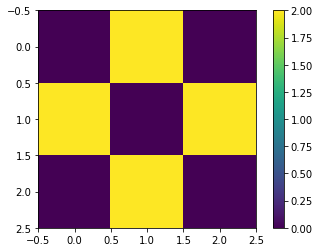

In [39]:
# 2D kernel - HWIO layout
kernel_np = np.zeros((3, 3, 3, 3), dtype=jnp.float32)

#kernel_np += np.array([[3, 5]])[:, :, jnp.newaxis, jnp.newaxis]

I,J,K,L = np.indices((3, 3, 3, 3))
#kernel_np[K==L] = kernel_np[K==L]


for a in range(3):
  for b in range(3):
    kernel_np += (J == I+1)*(K==a)*(L==b)*M[a,b]
    kernel_np += (J == I-1)*(K==a)*(L==b)*M[a,b]



kernel = jnp.array(kernel_np,dtype=float)


print("Edge Conv kernel:")
plt.imshow(kernel[:, :, 0, 2]);
plt.colorbar()

In [40]:
# NHWC layout
#img = jnp.zeros((1, 20, 30, 3), dtype=jnp.float32)
#for k in range(3):
#  x = 3 + 5*k
#  y = 2 + 5*k
#  img = img.at[0, x:x+1, y:y+1, k].set(1.0)

#print("Original Image:")
def print_image(img):
  for ch in range(3):
    print(f"Channel {ch}")
    plt.imshow(img[0,:,:,ch]);
    plt.colorbar()
    plt.show()

#print_image(img)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Channel 0


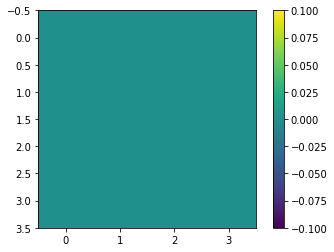

Channel 1


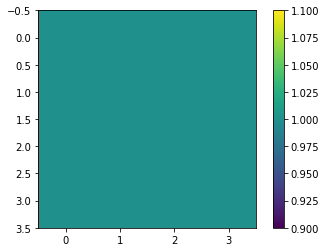

Channel 2


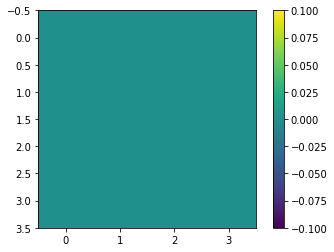

In [41]:
original_array = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],dtype=float)
img = jax.nn.one_hot(original_array,3)
img = img[jnp.newaxis,:,:,:]
print(original_array)
print_image(img)

out_t shape:  (1, 4, 4, 3)
[[[[ 8.]
   [12.]
   [12.]
   [ 8.]]

  [[12.]
   [16.]
   [16.]
   [12.]]

  [[12.]
   [16.]
   [16.]
   [12.]]

  [[ 8.]
   [12.]
   [12.]
   [ 8.]]]]
Channel 0


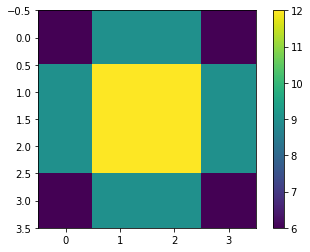

Channel 1


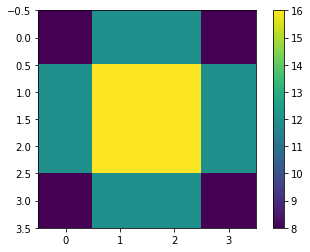

Channel 2


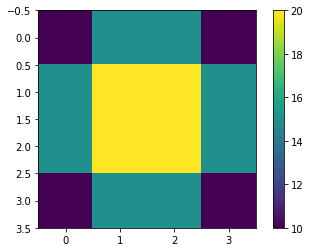

In [48]:
from jax import lax
out = lax.conv(jnp.transpose(img,[0,3,1,2]),    # lhs = NCHW image tensor
               jnp.transpose(kernel,[3,2,0,1]), # rhs = OIHW conv kernel tensor
               (1, 1),  # window strides
               'SAME') # padding mode
#plt.figure(figsize=(10,10))
#plt.imshow(np.array(out)[0,0,:,:]);

out_t = jnp.transpose(out, (0,2,3,1))


print("out_t shape: ", out_t.shape)

my_o_array = original_array.astype(int)


ans = np.take_along_axis(out_t, my_o_array[None,:,:,None],axis=-1 )
print(ans)



print_image(out_t)